### Introduction to CatBoost

**CatBoost** (Categorical Boosting) is a high-performance, open-source gradient boosting library developed by Yandex. It is designed to handle categorical features natively, providing several advantages in terms of speed and accuracy, especially when dealing with datasets that have a significant number of categorical variables.

#### Key Features

- **Native Handling of Categorical Features**: CatBoost can directly handle categorical features without requiring explicit preprocessing steps such as one-hot encoding or label encoding. This simplifies the data preparation process and helps preserve the information contained in categorical variables.
- **Robust to Overfitting**: CatBoost includes various mechanisms to prevent overfitting, such as ordered boosting and robust parameter tuning defaults.
- **Efficient Training**: The algorithm is optimized for fast training, leveraging CPU and GPU capabilities to handle large datasets efficiently.
- **Support for Missing Values**: CatBoost can handle missing values natively, which adds to its robustness and ease of use.
- **Versatility**: It supports both classification and regression tasks and can be used in a variety of domains, including finance, marketing, and healthcare.

### Comparison with XGBoost and LightGBM

#### Handling Categorical Data

- **XGBoost**: Can handle categorical features without one-hot encoding by specifying the `enable_categorical=True` parameter. However, preprocessing steps are still commonly used to improve model performance and interpretability.
  
- **LightGBM**: Supports native handling of categorical features through the `categorical_feature` parameter, which can significantly speed up training and improve accuracy.
  
- **CatBoost**: Natively supports categorical features by specifying the `cat_features` parameter without the need for preprocessing, reducing effort and preserving feature information.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])




Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.97        63
      benign       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [2]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.0,108,63,0,0,1.000000,0.631579,0.774194
1,0.1,107,6,57,1,0.990741,0.946903,0.968326
2,0.2,107,5,58,1,0.990741,0.955357,0.972727
3,0.3,107,4,59,1,0.990741,0.963964,0.977169
4,0.4,107,4,59,1,0.990741,0.963964,0.977169
5,0.5,107,3,60,1,0.990741,0.972727,0.981651
6,0.6,107,3,60,1,0.990741,0.972727,0.981651
7,0.7,106,2,61,2,0.981481,0.981481,0.981481
8,0.8,103,1,62,5,0.953704,0.990385,0.971698
9,0.9,100,1,62,8,0.925926,0.990099,0.956938


Feature importances:
mean concave points: 10.9064
worst concave points: 10.7865
worst texture: 9.7275
worst area: 7.3053
mean texture: 6.4080
worst concavity: 6.1540
worst radius: 6.0859
worst perimeter: 5.0396
area error: 3.8569
worst symmetry: 3.0786
worst smoothness: 3.0324
compactness error: 2.8503
radius error: 2.4800
symmetry error: 1.9859
mean concavity: 1.8836
mean radius: 1.5718
mean smoothness: 1.5093
perimeter error: 1.4666
fractal dimension error: 1.4138
concave points error: 1.4065
mean area: 1.4043
worst compactness: 1.3614
mean compactness: 1.3199
texture error: 1.3132
smoothness error: 1.0100
mean fractal dimension: 0.9743
mean symmetry: 0.9318
mean perimeter: 0.9282
concavity error: 0.9270
worst fractal dimension: 0.8811


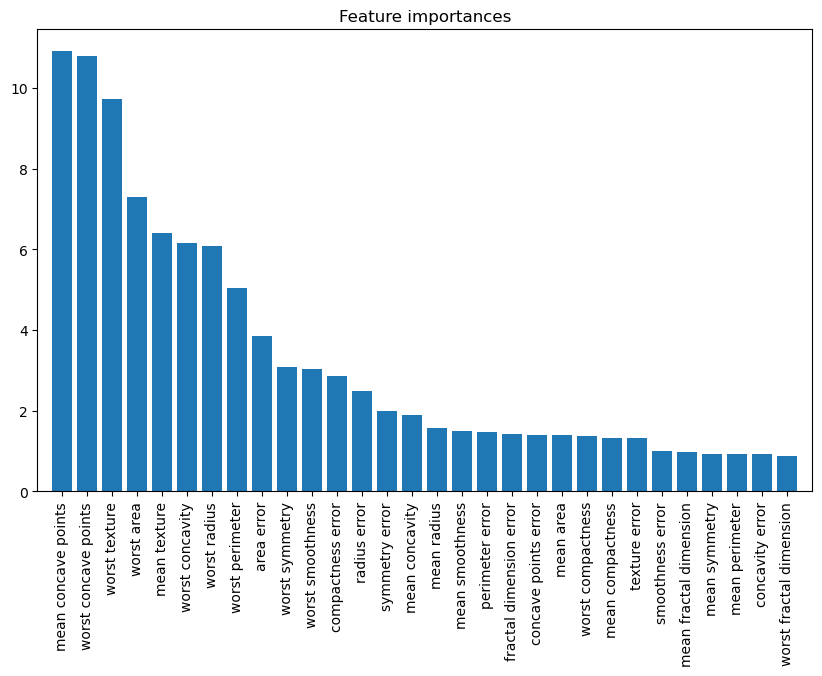

In [3]:
# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_matrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = breast_cancer.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Mean Squared Error: 0.1989
R-Squared: 0.8482
Feature importances:
MedInc: 33.4873
Latitude: 21.1845
Longitude: 18.6418
AveOccup: 13.8828
HouseAge: 5.4352
AveRooms: 3.5474
AveBedrms: 1.9205
Population: 1.9004


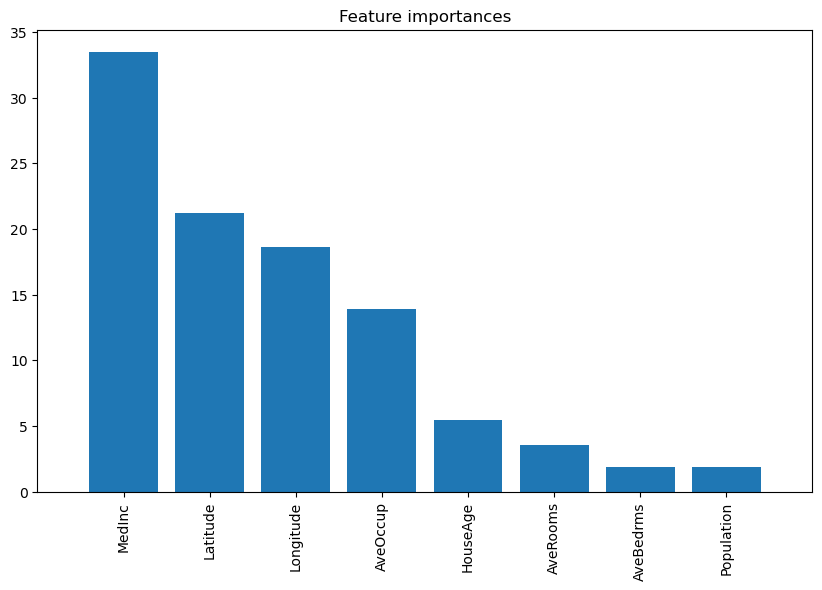

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = CatBoostRegressor(random_state=42, verbose=0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Best Hyperparameters: {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
Mean Squared Error: 0.1976
R-Squared: 0.8492
Feature importances:
MedInc: 32.1071
Longitude: 21.1427
Latitude: 19.5442
AveOccup: 14.1455
HouseAge: 5.2173
AveRooms: 3.8575
AveBedrms: 2.0156
Population: 1.9699


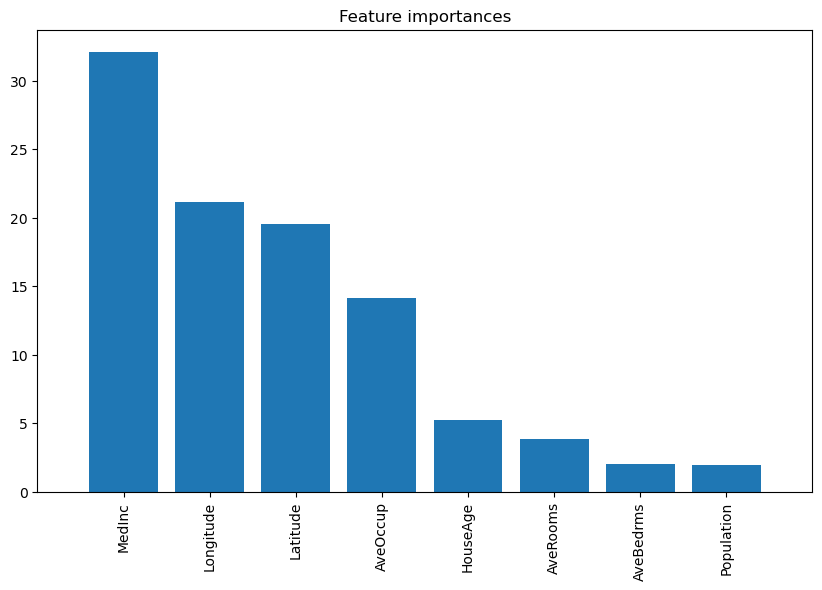

In [3]:
# CatBoost Regression with California Housing Dataset and Cross-Validation for Hyperparameter Tuning

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = CatBoostRegressor(random_state=42, silent=True)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = best_model.get_feature_importance()
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
